In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [44]:
h = ['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure (mm Hg)',
     'Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)',
     'Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function',
     'Age (years)','Is diabetic']
df = pd.read_csv('data/pima-indians-diabetes.csv',header=None,names=h)

In [45]:
df.head()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Is diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Is diabetic'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Number of times pregnant                        768 non-null    int64  
 1   Plasma glucose concentration                    768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                768 non-null    int64  
 3   Triceps skin fold thickness (mm)                768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                  768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)  768 non-null    float64
 6   Diabetes pedigree function                      768 non-null    float64
 7   Age (years)                                     768 non-null    int64  
 8   Is diabetic                                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 K

In [48]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Is diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
df.isnull().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skin fold thickness (mm)                  0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age (years)                                       0
Is diabetic                                       0
dtype: int64

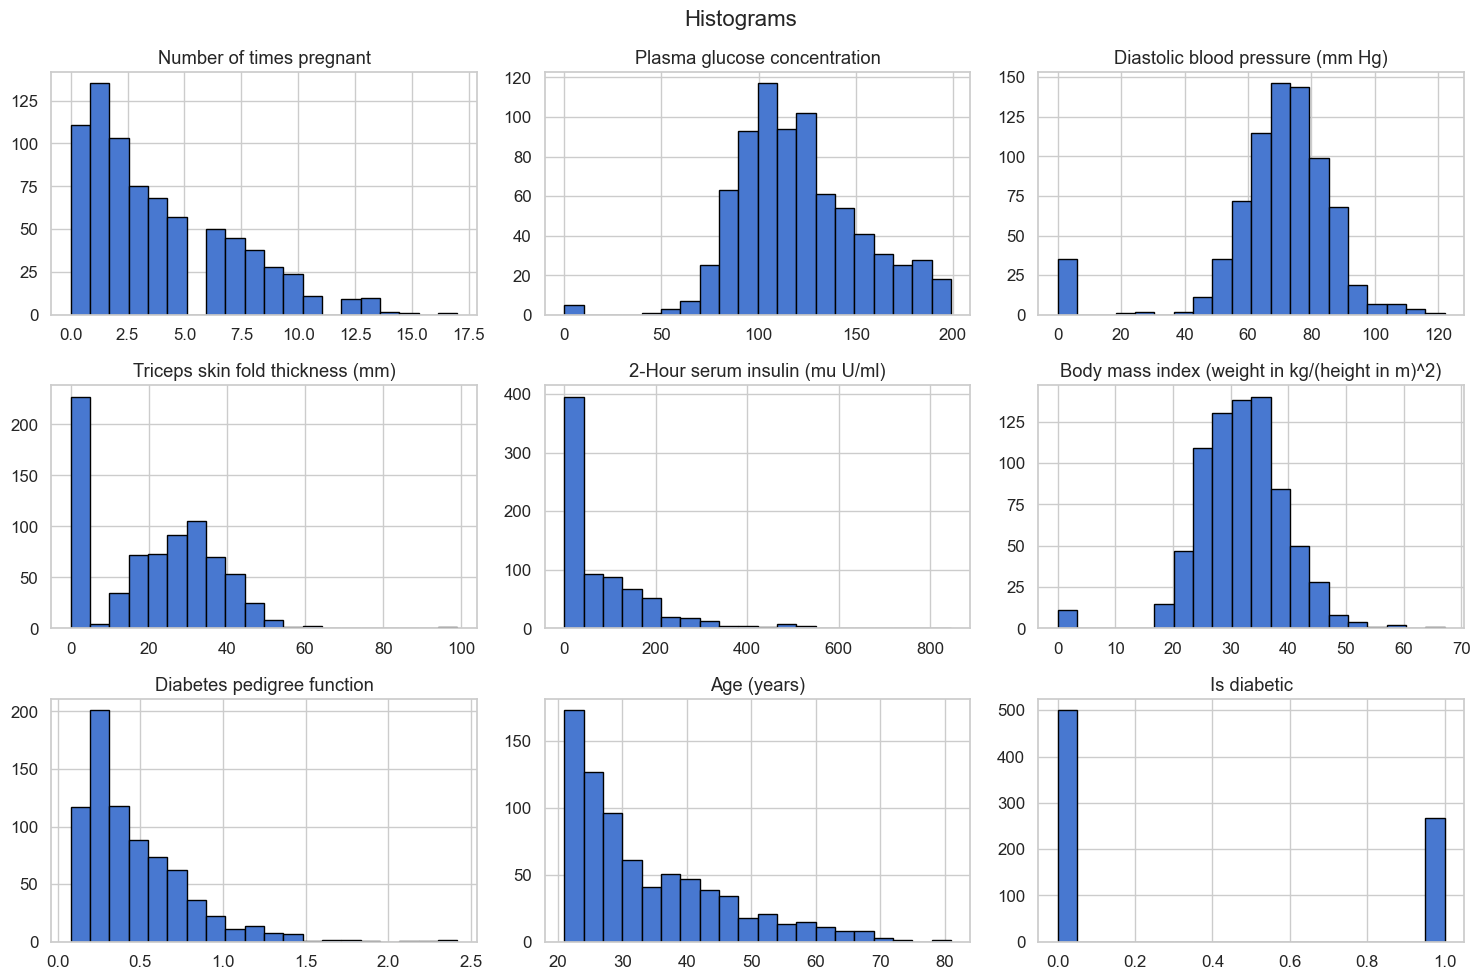

In [50]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Histograms for all features
df.hist(bins=20,figsize=(15,10), edgecolor='black')
plt.suptitle('Histograms', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

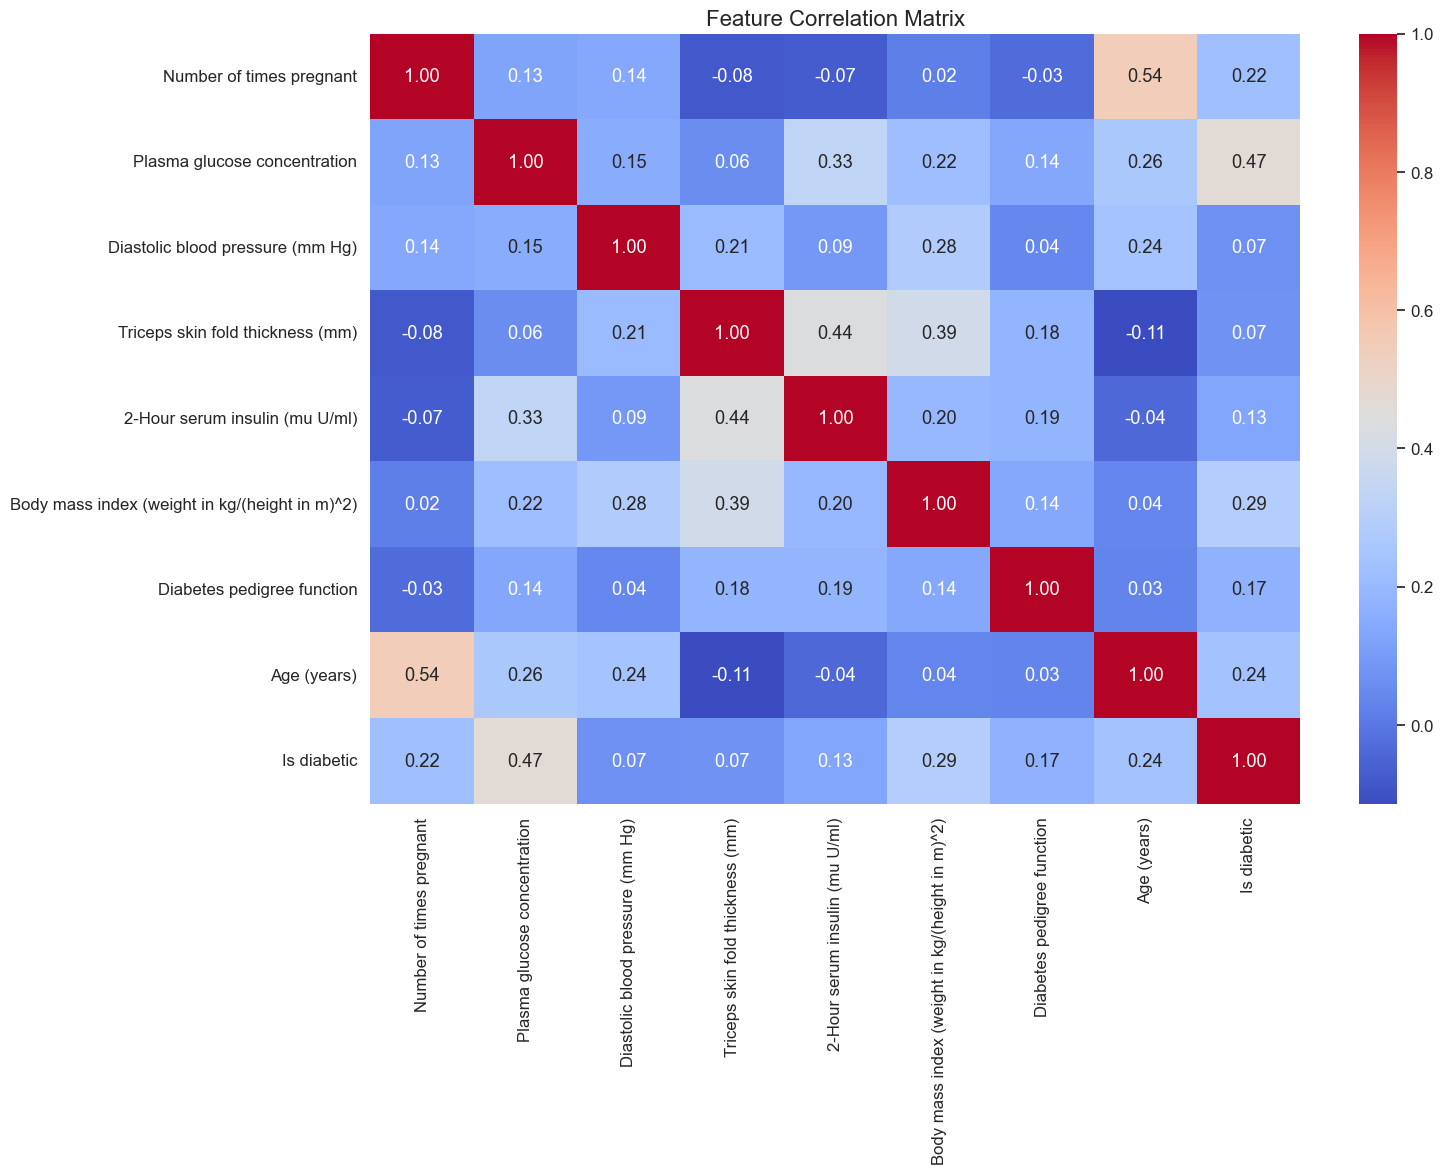

In [51]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

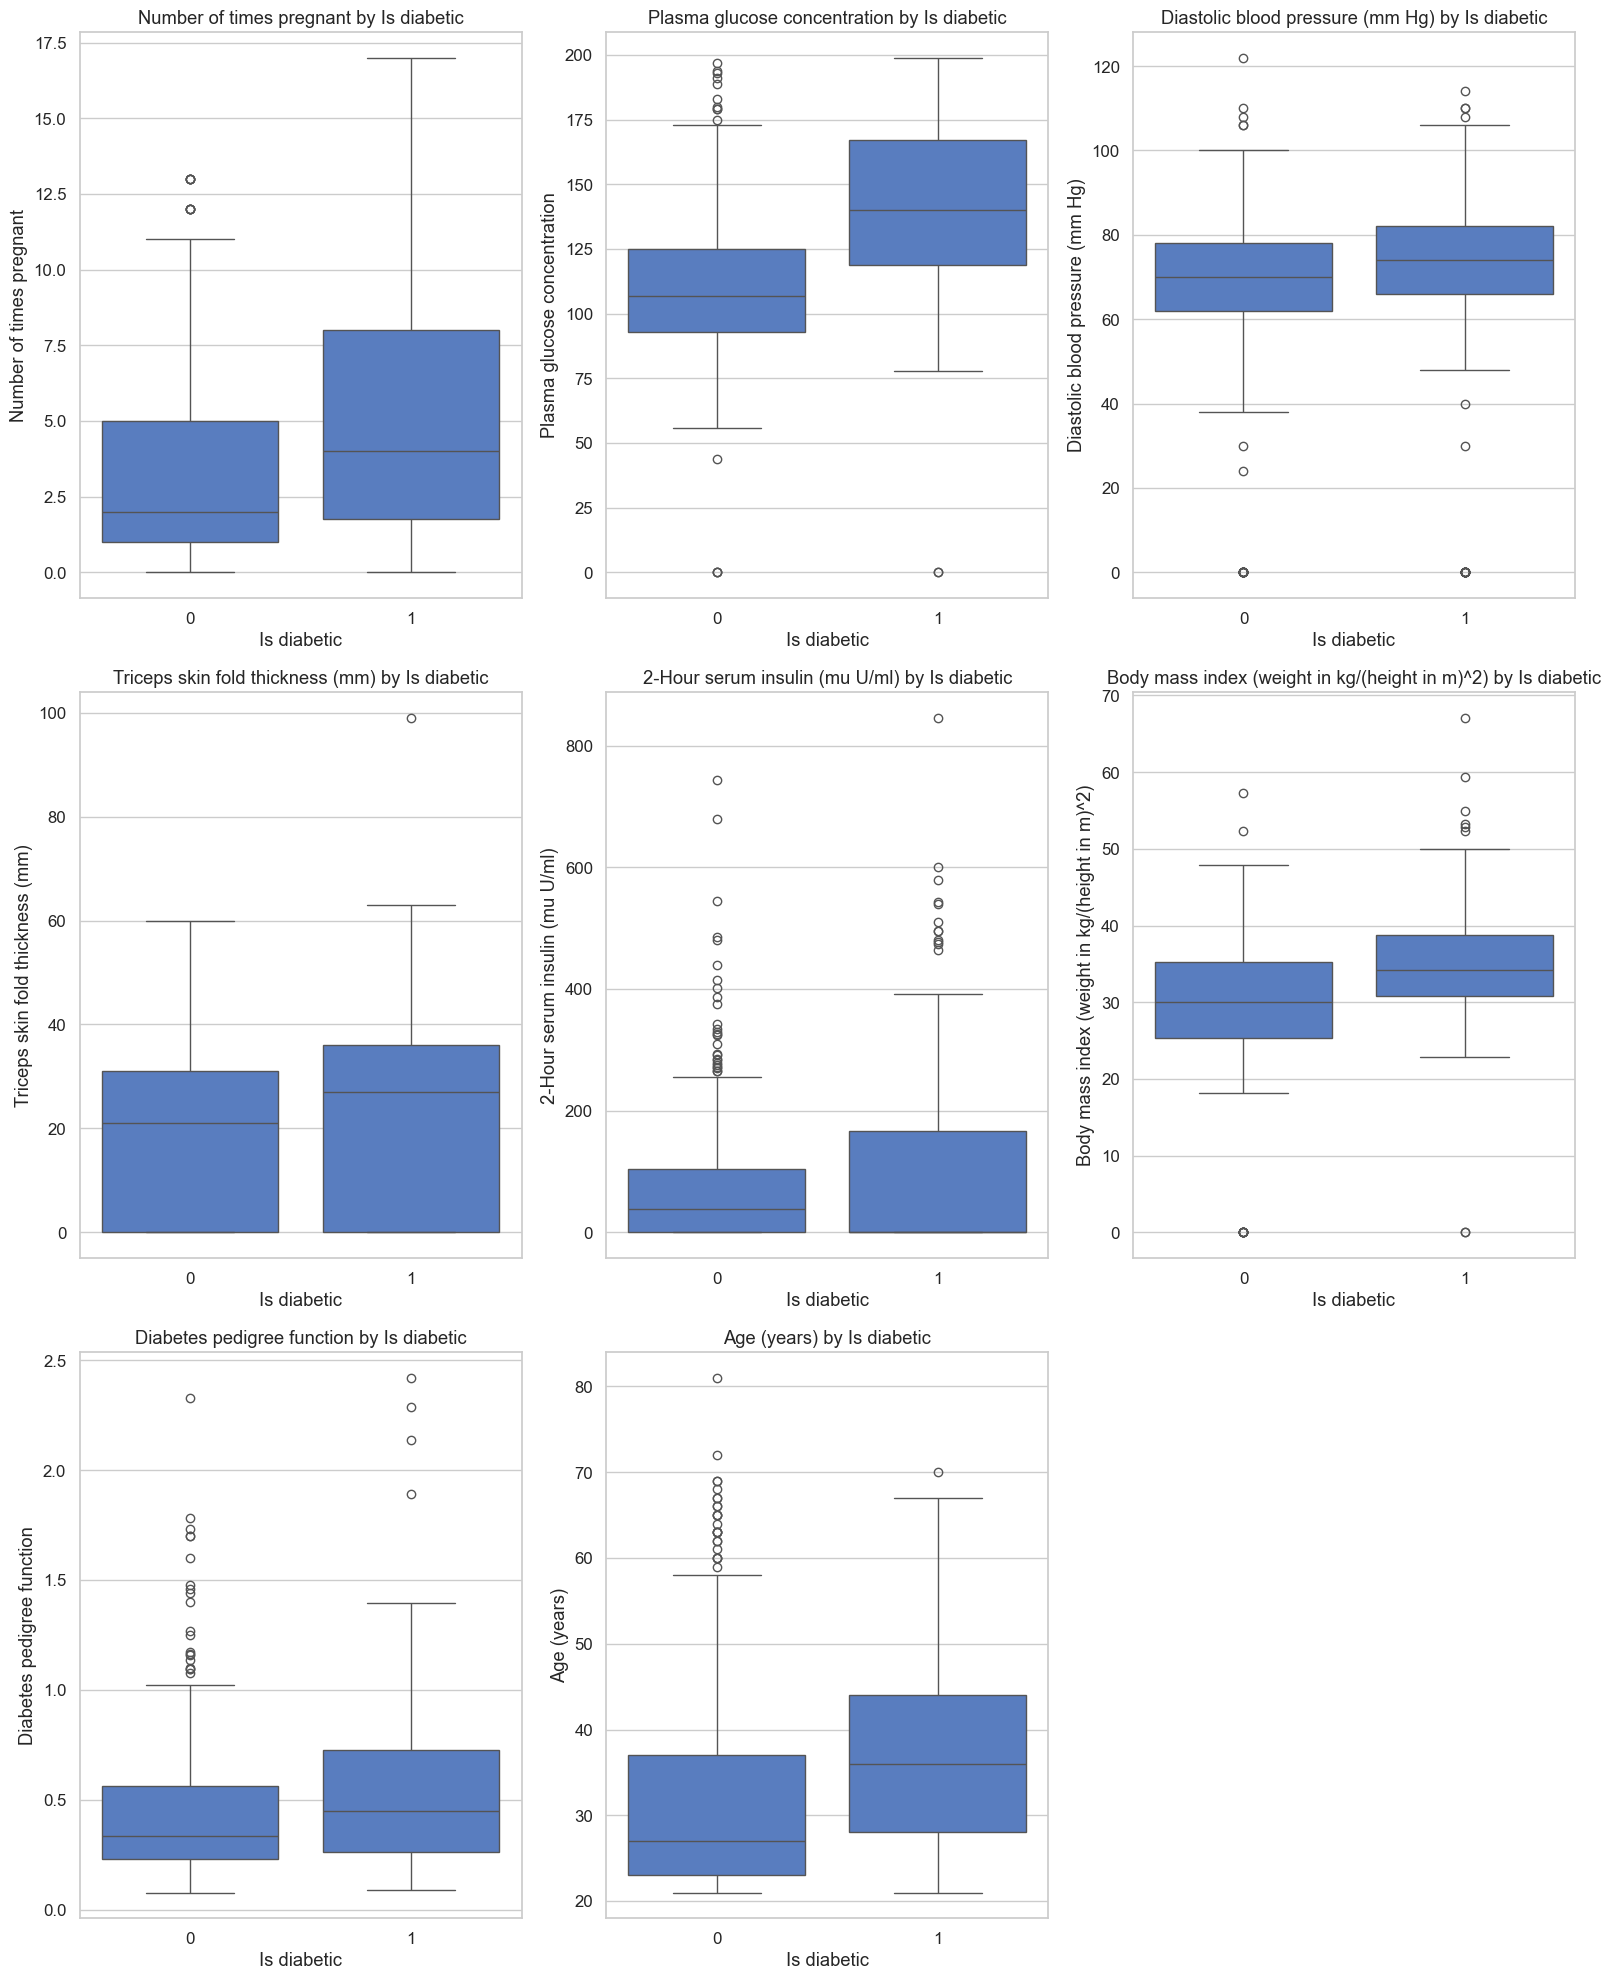

In [52]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Is diabetic', y=col)
    plt.title(f'{col} by Is diabetic')
plt.tight_layout(rect=[0, 0, 1, 2])
plt.show()

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

X = df.drop('Is diabetic', axis=1)
y = df['Is diabetic']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (614, 8), Testing Set: (154, 8)


In [54]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [55]:
y_pred = pipeline.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Model Accuracy:", accuracy)
# print("Accuracy Score:", (y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Model Accuracy: 0.7597402597402597
Confusion Matrix:
 [[85 15]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0      0.794     0.850     0.821       100
           1      0.681     0.593     0.634        54

    accuracy                          0.760       154
   macro avg      0.738     0.721     0.727       154
weighted avg      0.755     0.760     0.755       154



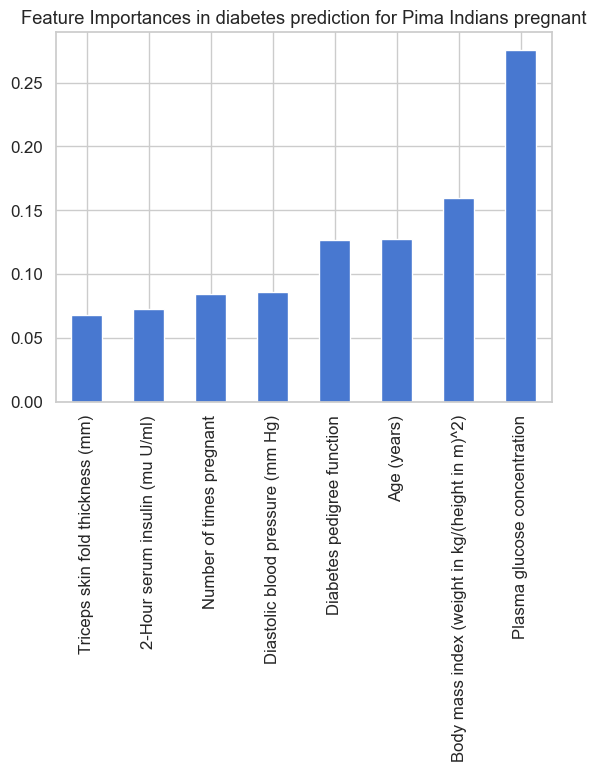

In [56]:
pipeline.feature_importances_ = pipeline.named_steps['classifier'].feature_importances_
feature_importances = pd.Series(pipeline.feature_importances_, index=X.columns).sort_values().plot(kind='bar')
plt.title("Feature Importances in diabetes prediction for Pima Indians pregnant")
plt.show()